In [ ]:
!unzip drive/MyDrive/archive.zip

# Execution Steps

1. Import Libraries
2. Load data & create data loaders
3. Build Model
4. Train & Evaluate the Model

#Step 1: Importing the libraries

In [2]:
# Libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Step 2: Load data and create data loaders

In [3]:
img_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_loader = img_gen.flow_from_directory(
    directory = "seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42, )

test_loader = img_gen.flow_from_directory(
    directory = "seg_test/seg_test", target_size = (128, 128), batch_size = 50, seed = 42, )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [6]:
idx_to_classes = {val:key for key,val in dict(train_loader.class_indices).items()}

In [7]:
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

# Step 3: Build Model

In [8]:
model = Sequential()
#Covolution 1
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = "relu",
                 input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Covolution 2
model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = "relu"))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully connected layers
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(6, activation = "softmax"))

In [9]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [10]:
#Steps
train_steps = len(train_loader) # = (round(total_train_images / batch_size))
test_steps = len(test_loader) # = (round(total_test_images / batch_size))

In [11]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch=train_steps,
    epochs = 20,
    validation_data = test_loader,
    validation_steps = test_steps)

Epoch 1/20


<ipython-input-11-be27086e3da4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


281/281 [==============================] - 26s 68ms/step - loss: 1.2518 - accuracy: 0.5983 - val_loss: 2.3030 - val_accuracy: 0.3017
Epoch 2/20
281/281 [==============================] - 19s 69ms/step - loss: 0.8394 - accuracy: 0.7170 - val_loss: 1.4992 - val_accuracy: 0.5077
Epoch 3/20
281/281 [==============================] - 21s 75ms/step - loss: 0.6239 - accuracy: 0.7795 - val_loss: 1.5203 - val_accuracy: 0.5310
Epoch 4/20
281/281 [==============================] - 18s 65ms/step - loss: 0.5316 - accuracy: 0.8084 - val_loss: 0.6988 - val_accuracy: 0.7730
Epoch 5/20
281/281 [==============================] - 19s 67ms/step - loss: 0.4596 - accuracy: 0.8328 - val_loss: 0.8550 - val_accuracy: 0.7547
Epoch 6/20
281/281 [==============================] - 19s 66ms/step - loss: 0.3990 - accuracy: 0.8541 - val_loss: 0.6279 - val_accuracy: 0.7990
Epoch 7/20
281/281 [==============================] - 21s 75ms/step - loss: 0.3629 - accuracy: 0.8700 - val_loss: 0.9160 - val_accuracy: 0.7260
Epo

# Model metrics

In [12]:
train_loss = train_metrics.history["loss"]
train_accuracy = train_metrics.history["accuracy"]
test_loss = train_metrics.history["val_loss"]
test_accuracy = train_metrics.history["val_accuracy"]

Train Loss vs Validation Loss

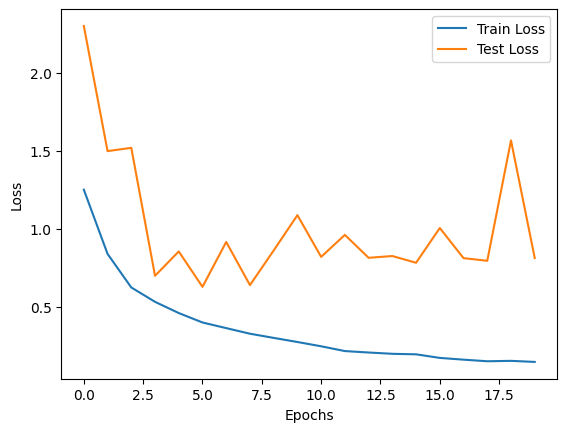

In [13]:
plt.plot(range(20), train_loss, label = "Train Loss")
plt.plot(range(20), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Train accuracy vs validation accuracy

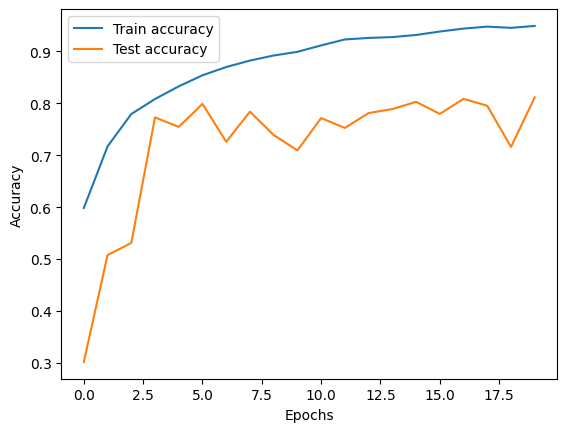

In [14]:
plt.plot(range(20), train_accuracy, label = "Train accuracy")
plt.plot(range(20), test_accuracy, label = "Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Model peformance demostration

In [15]:
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]

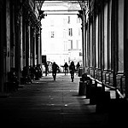

Model Prediction:  street


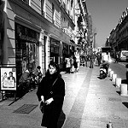

Model Prediction:  street


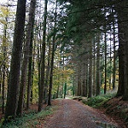

Model Prediction:  forest


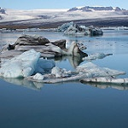

Model Prediction:  glacier


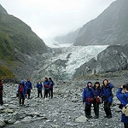

Model Prediction:  mountain


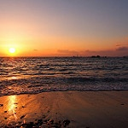

Model Prediction:  sea


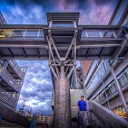

Model Prediction:  buildings


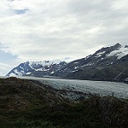

Model Prediction:  mountain


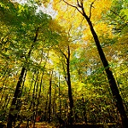

Model Prediction:  forest


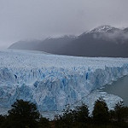

Model Prediction:  mountain


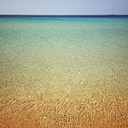

Model Prediction:  sea


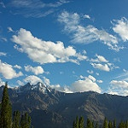

Model Prediction:  glacier


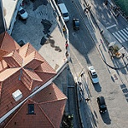

Model Prediction:  street


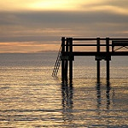

Model Prediction:  sea


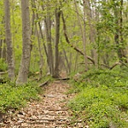

Model Prediction:  forest


In [16]:
for i in range(15):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128,128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ", idx_to_classes[pred])
  print("=======================================")

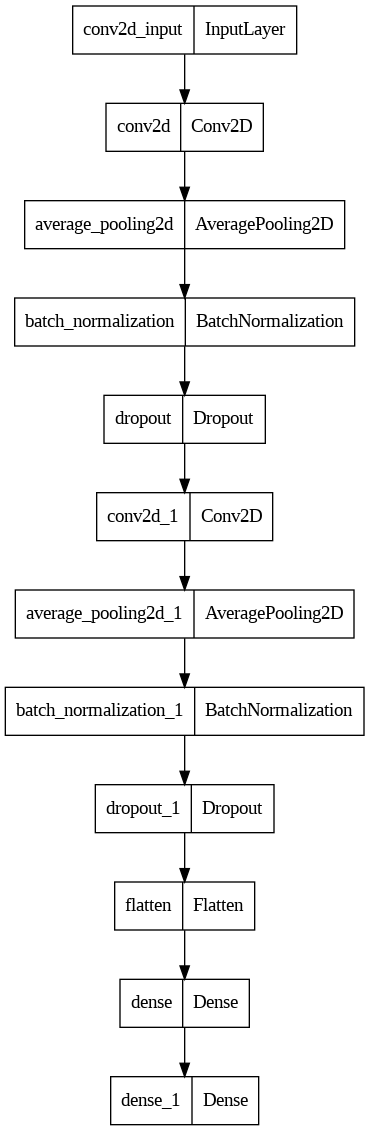

In [17]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='model.png')

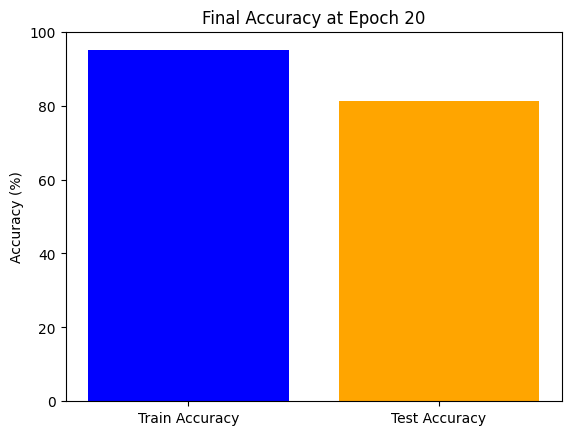

In [20]:
# Plotting Final Accuracy
final_epoch = 19  # Index of the final epoch

train_final_accuracy = train_accuracy[final_epoch] * 100
test_final_accuracy = test_accuracy[final_epoch] * 100

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_final_accuracy, test_final_accuracy], color=['blue', 'orange'])
plt.ylabel("Accuracy (%)")
plt.title("Final Accuracy at Epoch 20")
plt.ylim(0, 100)  # Set y-axis limit to represent percentages
plt.show()


Found 3000 images belonging to 6 classes.
60/60 [==============================] - 5s 85ms/step


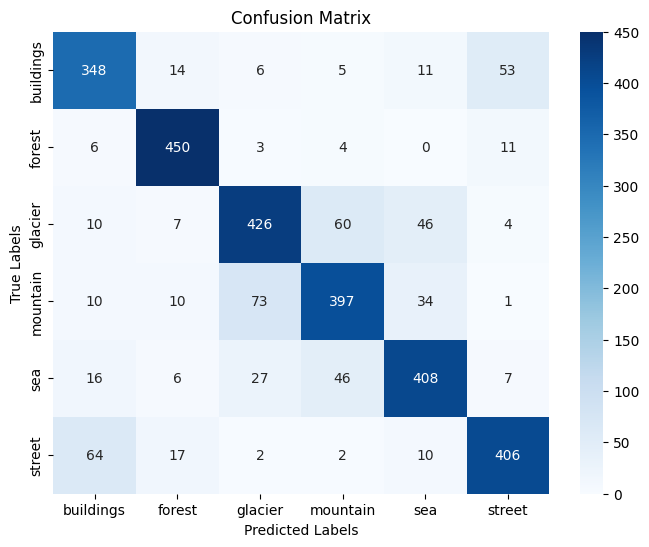

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the test data
test_data_gen = ImageDataGenerator(rescale=1./255)
test_loader = test_data_gen.flow_from_directory(
    directory="seg_test/seg_test",
    target_size=(128, 128),
    batch_size=50,
    seed=42,
    shuffle=False,  # Important: set shuffle to False for correct matching of true and predicted labels
)

# Get the true labels
y_true = test_loader.classes

# Generate predictions for the test set
y_pred_probabilities = model.predict(test_loader)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_loader.class_indices.keys(), yticklabels=test_loader.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# 1. Base Model Results

Setting up the model and training it without using data augmentation or adaptive learning rate.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your base model without data augmentation
base_model = Sequential()

# Convolutional layers
base_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
base_model.add(MaxPooling2D(2, 2))
base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(2, 2))
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(MaxPooling2D(2, 2))

# Flatten layer
base_model.add(Flatten())

# Fully connected layers
base_model.add(Dense(128, activation='relu'))
base_model.add(Dense(6, activation='softmax'))  # Assuming you have 6 classes

# Compile the model
base_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the base model
base_train_metrics = base_model.fit_generator(
    generator=train_loader,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=test_loader,
    validation_steps=test_steps
)

# Retrieve metrics for plotting later
base_train_loss = base_train_metrics.history["loss"]
base_train_accuracy = base_train_metrics.history["accuracy"]
base_test_loss = base_train_metrics.history["val_loss"]
base_test_accuracy = base_train_metrics.history["val_accuracy"]


Epoch 1/20


<ipython-input-22-e4637ce219d2>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  base_train_metrics = base_model.fit_generator(


281/281 [==============================] - 31s 83ms/step - loss: 0.9574 - accuracy: 0.6285 - val_loss: 0.7125 - val_accuracy: 0.7357
Epoch 2/20
281/281 [==============================] - 18s 65ms/step - loss: 0.6381 - accuracy: 0.7701 - val_loss: 0.5893 - val_accuracy: 0.7943
Epoch 3/20
281/281 [==============================] - 21s 76ms/step - loss: 0.4998 - accuracy: 0.8200 - val_loss: 0.6365 - val_accuracy: 0.7647
Epoch 4/20
281/281 [==============================] - 19s 68ms/step - loss: 0.3980 - accuracy: 0.8581 - val_loss: 0.4903 - val_accuracy: 0.8313
Epoch 5/20
281/281 [==============================] - 21s 75ms/step - loss: 0.2925 - accuracy: 0.8960 - val_loss: 0.7127 - val_accuracy: 0.7743
Epoch 6/20
281/281 [==============================] - 19s 66ms/step - loss: 0.2135 - accuracy: 0.9228 - val_loss: 0.5914 - val_accuracy: 0.8240
Epoch 7/20
281/281 [==============================] - 18s 65ms/step - loss: 0.1427 - accuracy: 0.9500 - val_loss: 0.6702 - val_accuracy: 0.8243
Epo

# 2. Data Augmentation Results:

Now, introducing data augmentation in training. This involves updating img_gen generator to include augmentation transformations.

In [23]:
# Add data augmentation to the image generator
img_gen_with_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model with data augmentation
augmented_train_loader = img_gen_with_augmentation.flow_from_directory(
    directory="seg_train/seg_train",
    target_size=(128, 128),
    batch_size=50,
    seed=42
)

# Compile the model (you can reuse the base_model)
base_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model with data augmentation
augmented_train_metrics = base_model.fit_generator(
    generator=augmented_train_loader,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=test_loader,
    validation_steps=test_steps
)

# Retrieve metrics for plotting later
augmented_train_loss = augmented_train_metrics.history["loss"]
augmented_train_accuracy = augmented_train_metrics.history["accuracy"]
augmented_test_loss = augmented_train_metrics.history["val_loss"]
augmented_test_accuracy = augmented_train_metrics.history["val_accuracy"]

Found 14034 images belonging to 6 classes.


<ipython-input-23-94bcf16699ed>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  augmented_train_metrics = base_model.fit_generator(


Epoch 1/20
281/281 [==============================] - 80s 273ms/step - loss: 0.7511 - accuracy: 0.7450 - val_loss: 0.4859 - val_accuracy: 0.8340
Epoch 2/20
281/281 [==============================] - 76s 271ms/step - loss: 0.5892 - accuracy: 0.7833 - val_loss: 0.5002 - val_accuracy: 0.8257
Epoch 3/20
281/281 [==============================] - 77s 272ms/step - loss: 0.5455 - accuracy: 0.7996 - val_loss: 0.4399 - val_accuracy: 0.8457
Epoch 4/20
281/281 [==============================] - 77s 273ms/step - loss: 0.5229 - accuracy: 0.8098 - val_loss: 0.5762 - val_accuracy: 0.8080
Epoch 5/20
281/281 [==============================] - 76s 271ms/step - loss: 0.4978 - accuracy: 0.8178 - val_loss: 0.4452 - val_accuracy: 0.8453
Epoch 6/20
281/281 [==============================] - 79s 280ms/step - loss: 0.4941 - accuracy: 0.8167 - val_loss: 0.4463 - val_accuracy: 0.8473
Epoch 7/20
281/281 [==============================] - 79s 281ms/step - loss: 0.4851 - accuracy: 0.8216 - val_loss: 0.4302 - val_ac

# 3. Adaptive Learning Rate Results:

We can use a learning rate scheduler to implement adaptive learning rates.

In [26]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the learning rate scheduler
base_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model with the learning rate scheduler
adaptive_lr_train_metrics = base_model.fit_generator(
    generator=train_loader,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=test_loader,
    validation_steps=test_steps,
    callbacks=[lr_scheduler]
)

# Retrieve metrics for plotting later
adaptive_lr_train_loss = adaptive_lr_train_metrics.history["loss"]
adaptive_lr_train_accuracy = adaptive_lr_train_metrics.history["accuracy"]
adaptive_lr_test_loss = adaptive_lr_train_metrics.history["val_loss"]
adaptive_lr_test_accuracy = adaptive_lr_train_metrics.history["val_accuracy"]

Epoch 1/20


<ipython-input-26-5bdcb50a0424>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  adaptive_lr_train_metrics = base_model.fit_generator(


281/281 [==============================] - 22s 74ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.8135 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 2/20
281/281 [==============================] - 18s 64ms/step - loss: 0.0083 - accuracy: 0.9984 - val_loss: 0.8746 - val_accuracy: 0.8537 - lr: 9.0000e-04
Epoch 3/20
281/281 [==============================] - 23s 81ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.9596 - val_accuracy: 0.8440 - lr: 8.1000e-04
Epoch 4/20
281/281 [==============================] - 19s 66ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 1.1415 - val_accuracy: 0.8160 - lr: 7.2900e-04
Epoch 5/20
281/281 [==============================] - 18s 64ms/step - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.9581 - val_accuracy: 0.8480 - lr: 6.5610e-04
Epoch 6/20
281/281 [==============================] - 18s 63ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.9090 - val_accuracy: 0.8553 - lr: 5.9049e-04
Epoch 7/20
281/281 [=============================

# Plotting the results

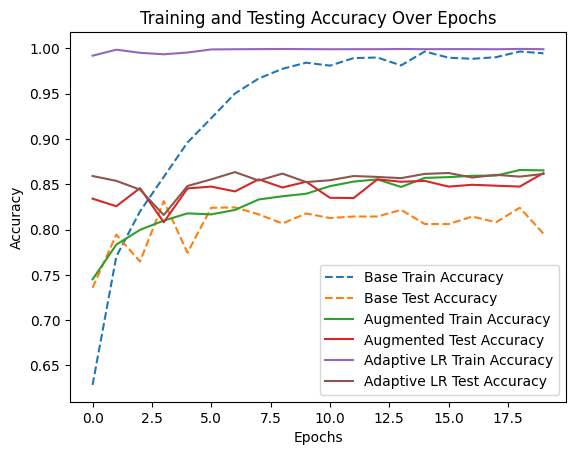

In [27]:
plt.plot(range(20), base_train_accuracy, label="Base Train Accuracy", linestyle='--')
plt.plot(range(20), base_test_accuracy, label="Base Test Accuracy", linestyle='--')

plt.plot(range(20), augmented_train_accuracy, label="Augmented Train Accuracy")
plt.plot(range(20), augmented_test_accuracy, label="Augmented Test Accuracy")

plt.plot(range(20), adaptive_lr_train_accuracy, label="Adaptive LR Train Accuracy")
plt.plot(range(20), adaptive_lr_test_accuracy, label="Adaptive LR Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy Over Epochs")
plt.legend()
plt.show()